> Importing libraries

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

Taking the datasets

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


Reading the datasets

In [3]:
train=pd.read_csv("/kaggle/input/titanic/train.csv")
test=pd.read_csv("/kaggle/input/titanic/test.csv")

Exploring the data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.shape

(891, 12)

In [6]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test.shape

(418, 11)

In [9]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [10]:
train_nullity=train.isnull()
train_nullity.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False


In [11]:
train_nullity.sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
train_nullity.mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

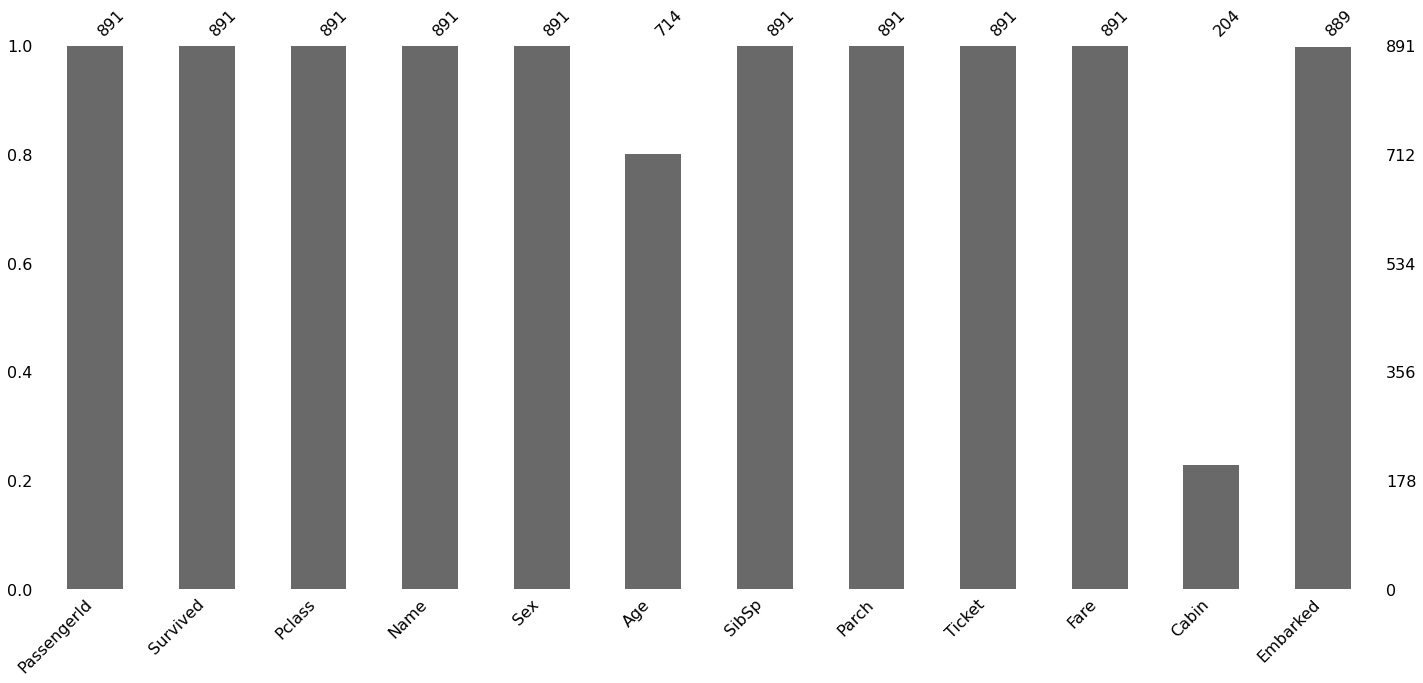

In [13]:
msno.bar(train)

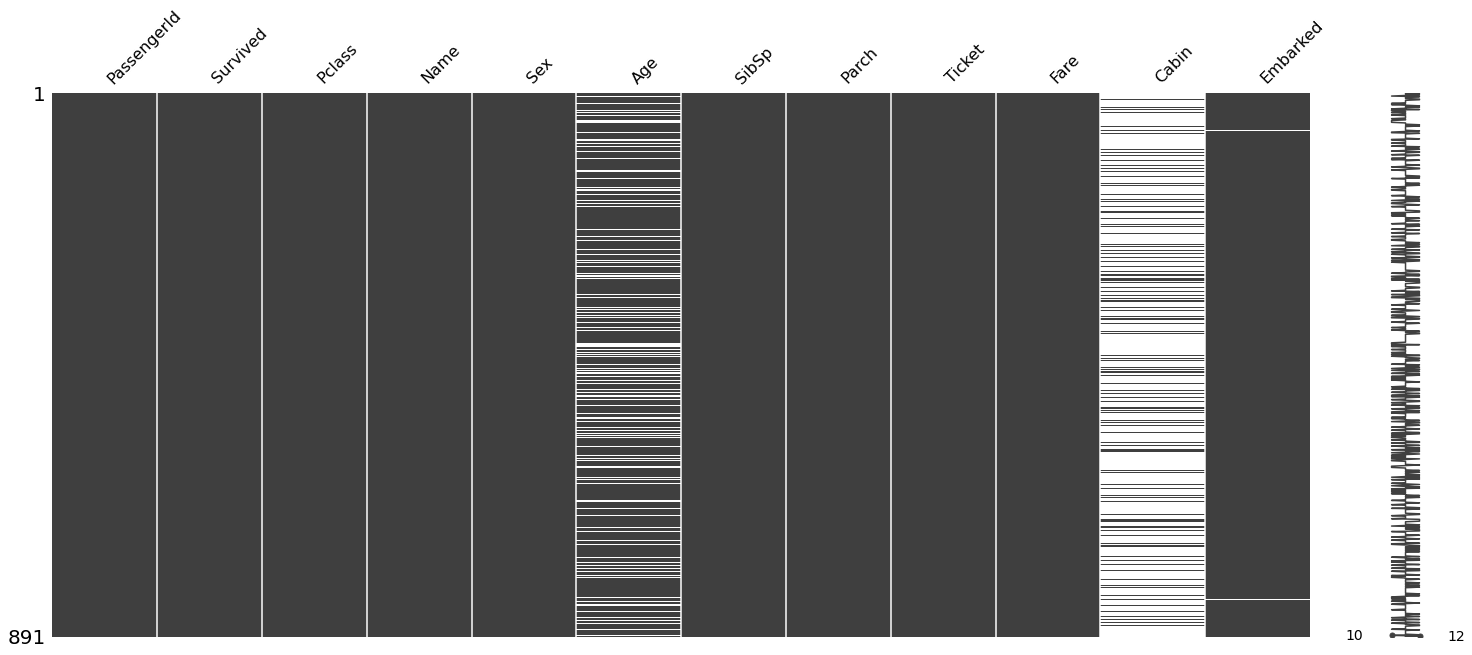

In [14]:
msno.matrix(train)

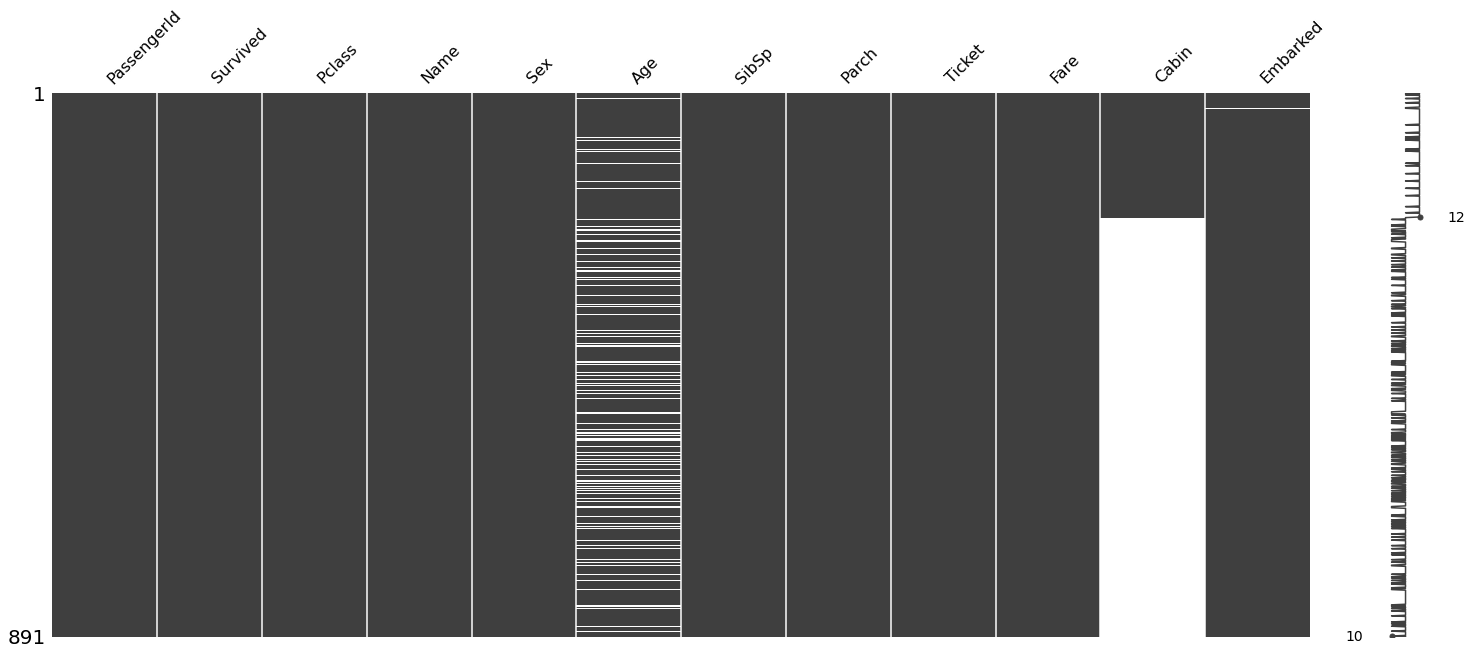

In [15]:
sort_train=train.sort_values('Cabin')
msno.matrix(sort_train)

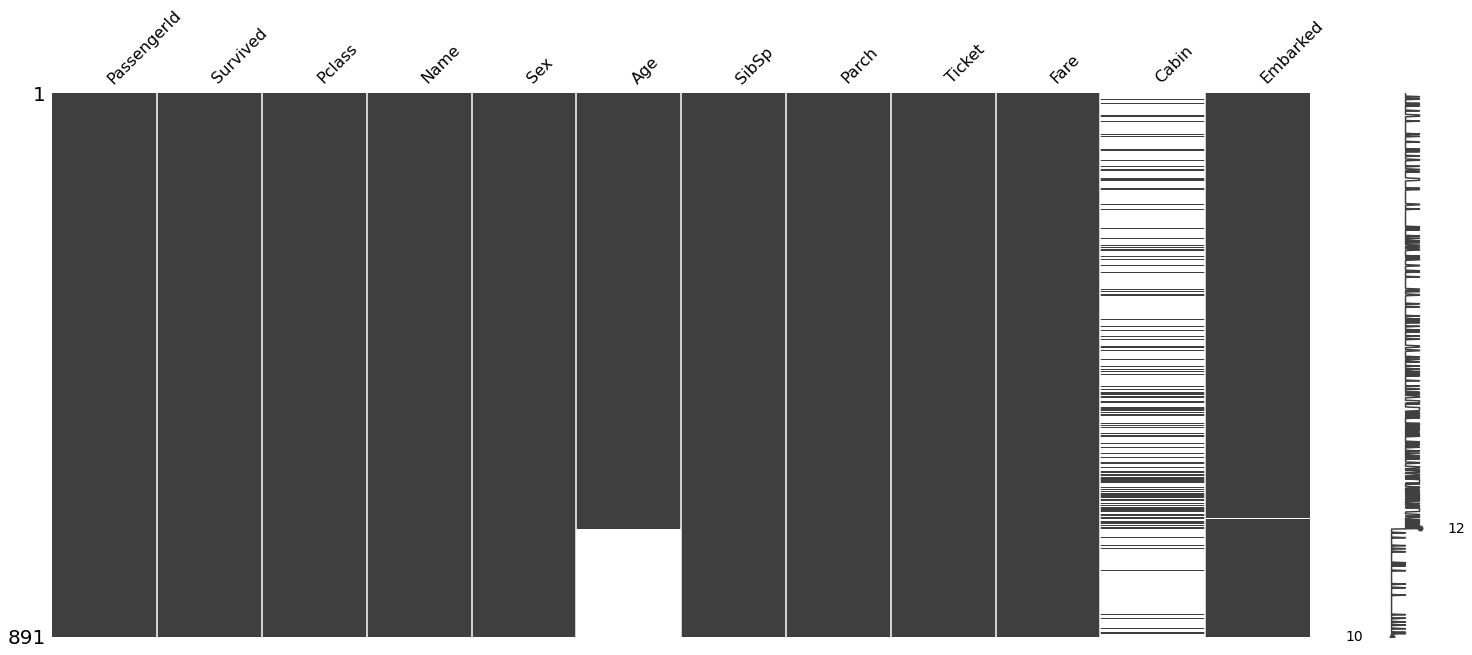

In [16]:
sort_train=train.sort_values('Age')
msno.matrix(sort_train)

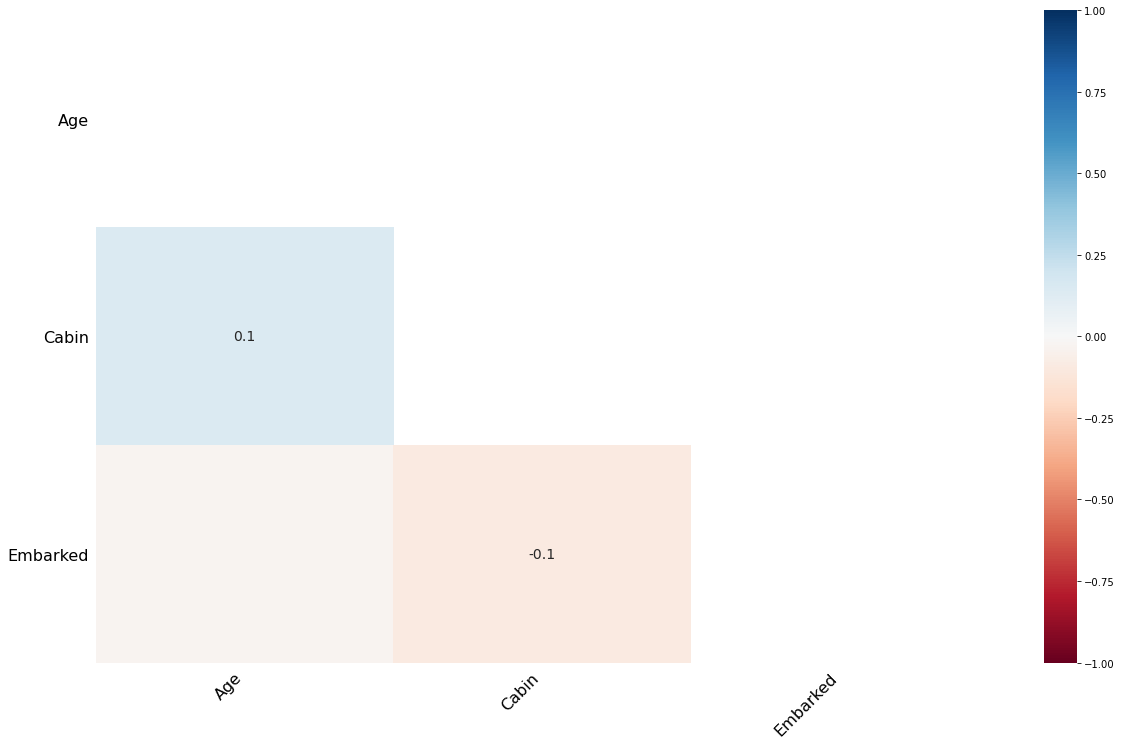

In [17]:
msno.heatmap(train)

In [18]:
test_nullity=test.isnull()
test_nullity.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False


In [19]:
test_nullity.sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Visualization Datas

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


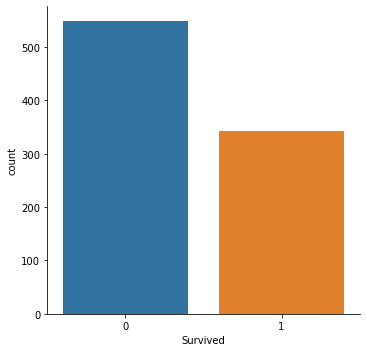

In [20]:
sns.factorplot(x="Survived", data=train, kind="count")

In [21]:
train["Survived"].mean()

0.3838383838383838

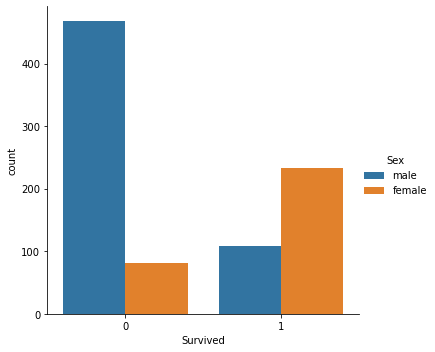

In [22]:
sns.factorplot(x="Survived", data=train, hue="Sex", kind="count")

In [23]:
train.groupby(["Sex", "Pclass"]).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

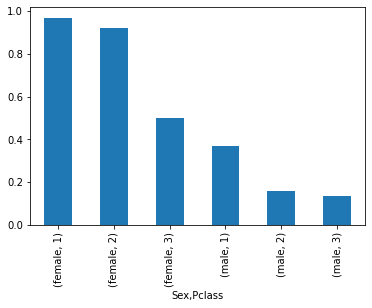

In [24]:
train_mean=train.groupby(["Sex", "Pclass"]).mean()
train_mean["Survived"].plot(kind="bar")

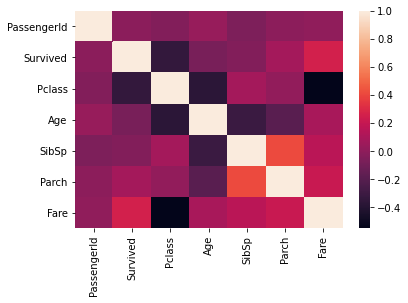

In [25]:
sns.heatmap(train.corr())

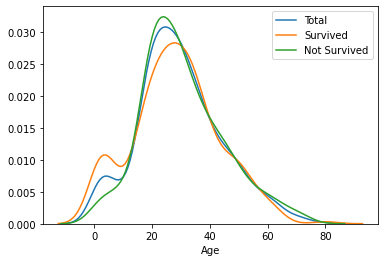

In [26]:
t1=train[train["Survived"]==1]
t2=train[train["Survived"]==0]
sns.distplot(train['Age'], hist=False, label="Total")
sns.distplot(t1['Age'], hist=False, label="Survived")
sns.distplot(t2['Age'], hist=False, label="Not Survived")

In [27]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
dummy_train=train.copy()
dummy_train["age_group"]=pd.cut(train['Age'], bins=bins,  right=False)
t=dummy_train.groupby(["age_group", "Sex", "Pclass"]).count()
d_g_train=dummy_train.groupby(["age_group", "Sex", "Pclass"]).mean()
d_g_train["Count"]=t["Survived"]
d_g_train

PassengerId  Survived        Age     SibSp     Parch  \
age_group Sex    Pclass                                                         
[0, 10)   female 1        298.000000  0.000000   2.000000  1.000000  2.000000   
                 2        437.375000  1.000000   4.875000  0.750000  1.500000   
                 3        421.904762  0.523810   4.357143  1.857143  1.380952   
          male   1        376.000000  1.000000   2.460000  0.500000  2.000000   
                 2        463.555556  1.000000   2.258889  0.888889  1.222222   
                 3        416.809524  0.380952   4.543810  2.857143  1.380952   
[10, 20)  female 1        524.692308  1.000000  17.076923  0.538462  0.846154   
                 2        372.125000  1.000000  16.875000  0.250000  0.500000   
                 3        378.208333  0.541667  16.062500  0.833333  0.416667   
          male   1        527.400000  0.400000  16.800000  1.200000  1.200000   
                 2        395.600000  0.100000  18.000000  0.100000  0.100000   
                 3        472.785714  0.095238  16.785714  0.761905  0.380952   
[20, 30)  female 1        469.312500  0.937500  23.500000  0.687500  0.687500   
                 2        426.760000  0.880000  25.600000  0.640000  0.560000   
                 3        400.419355  0.483871  24.193548  0.290323  0.580645   
          male   1        370.388889  0.500000  26.000000  0.277778  0.277778   
                 2        507.464286  0.000000  25.142857  0.392857  0.142857   
                 3        429.843137  0.156863  24.112745  0.186275  0.029412   
[30, 40)  female 1        437.370370  1.000000  34.481481  0.481481  0.333333   
                 2        430.000000  0.941176  33.441176  0.411765  0.411765   
                 3        458.562500  0.437500  33.343750  0.687500  1.187500   
          male   1        565.869565  0.521739  35.086957  0.304348  0.260870   
                 2        429.935484  0.096774  33.677419  0.387097  0.193548   
                 3        492.452830  0.150943  33.566038  0.169811  0.150943   
[40, 50)  female 1        549.769231  1.000000  44.615385  0.384615  0.384615   
                 2        551.000000  0.900000  42.700000  0.500000  0.500000   
                 3        365.777778  0.000000  43.888889  0.555556  2.333333   
          male   1        407.750000  0.375000  45.270833  0.458333  0.041667   
                 2        332.250000  0.125000  44.250000  0.375000  0.125000   
                 3        521.840000  0.080000  43.180000  0.160000  0.360000   
[50, 60)  female 1        466.416667  0.916667  53.833333  0.583333  0.333333   
                 2        468.333333  0.833333  52.666667  0.166667  0.666667   
                 3               NaN       NaN        NaN       NaN       NaN   
          male   1        428.800000  0.266667  53.533333  0.333333  0.333333   
                 2        477.444444  0.000000  53.666667  0.111111  0.000000   
                 3        332.166667  0.000000  52.916667  0.000000  0.000000   
[60, 70)  female 1        491.000000  1.000000  61.666667  0.666667  0.000000   
                 2               NaN       NaN        NaN       NaN       NaN   
                 3        484.000000  1.000000  63.000000  0.000000  0.000000   
          male   1        438.600000  0.100000  62.400000  0.200000  0.600000   
                 2        430.000000  0.333333  62.666667  0.333333  0.333333   
                 3        304.000000  0.000000  63.000000  0.000000  0.000000   
[70, 80)  female 1               NaN       NaN        NaN       NaN       NaN   
                 2               NaN       NaN        NaN       NaN       NaN   
                 3               NaN       NaN        NaN       NaN       NaN   
          male   1        445.666667  0.000000  70.666667  0.333333  0.333333   
                 2        673.000000  0.000000  70.000000  0.000000  0.000000   
                 3        484.500000  0.000000  72.25000

In [28]:
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
y = train.Survived.copy()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [30]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

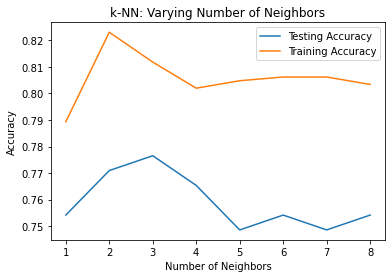

In [31]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [32]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.776536312849162


In [33]:
depth = np.arange(1, 9)
train_accuracy = np.empty(len(depth))
test_accuracy = np.empty(len(depth))
for i, k in enumerate(depth):
    ran = RandomForestClassifier(n_estimators=100, max_depth=k, random_state=1)
    ran.fit(X_train, y_train)
    train_accuracy[i] = ran.score(X_train, y_train)
    test_accuracy[i] = ran.score(X_test, y_test)

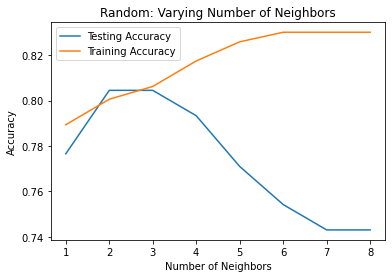

In [34]:
plt.title('Random: Varying Number of Neighbors')
plt.plot(depth, test_accuracy, label = 'Testing Accuracy')
plt.plot(depth, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [35]:
ran = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
ran.fit(X_train, y_train)
print(ran.score(X_test, y_test))

0.8044692737430168


In [36]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(gnb.score(X_test, y_test))

0.8044692737430168


In [37]:
train["age_group"]=dummy_train["age_group"]
features = ["Pclass", "Sex","SibSp", "Parch", "age_group"]
X = pd.get_dummies(train[features])
y = train.Survived.copy()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.770949720670391


In [40]:
depth = np.arange(1, 9)
train_accuracy = np.empty(len(depth))
test_accuracy = np.empty(len(depth))
for i, k in enumerate(depth):
    ran = RandomForestClassifier(n_estimators=100, max_depth=k, random_state=1)
    ran.fit(X_train, y_train)
    train_accuracy[i] = ran.score(X_train, y_train)
    test_accuracy[i] = ran.score(X_test, y_test)

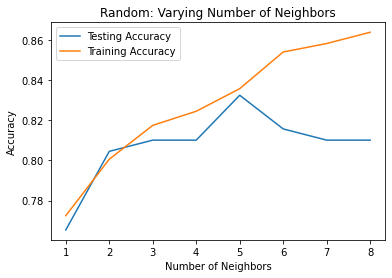

In [41]:
plt.title('Random: Varying Number of Neighbors')
plt.plot(depth, test_accuracy, label = 'Testing Accuracy')
plt.plot(depth, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [42]:
ran = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
ran.fit(X_train, y_train)
print(ran.score(X_test, y_test))

0.8324022346368715


In [43]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(gnb.score(X_test, y_test))

0.7821229050279329


In [44]:
y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

In [45]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]


dummy_train=train.copy()
dummy_train["age_group"]=pd.cut(train['Age'], bins=bins,  right=False)
train["age_group"]=dummy_train["age_group"]


dummy_test=test.copy()
dummy_test["age_group"]=pd.cut(test['Age'], bins=bins,  right=False)
test["age_group"]=dummy_test["age_group"]


features = ["Pclass", "Sex","SibSp", "Parch", "age_group"]
X = pd.get_dummies(train[features])
test2=test.copy()
X_test = pd.get_dummies(test2[features])


y = train["Survived"]


model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

In [46]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})

In [47]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
